<a href="https://colab.research.google.com/github/noushin94/ResponsibleAI/blob/main/Responsible_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 2**

In [ ]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt

# Reading data

In [ ]:
# Define the URL for the adult.data file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

In [ ]:

# Download the file from the URL
response = requests.get(url)

In [ ]:

# Check if the download was successful (status code 200)
if response.status_code == 200:
    # Read the CSV content from the response
    csv_content = StringIO(response.text)
      # Define column names based on the dataset's structure
    column_names = [
        'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
        'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
        'hours-per-week', 'native-country', 'income'
    ]

    # Read the CSV content into a pandas DataFrame
    census_data = pd.read_csv(csv_content, names=column_names, skipinitialspace=True)

    # Display the first few rows of the DataFrame to verify the data has been read correctly
    print(census_data.head())
else:
    print(f"Failed to download file. Status code: {response.status_code}")



   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [ ]:
census_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
census_data['sex'].value_counts() # imbalanced

Male      21790
Female    10771
Name: sex, dtype: int64

In [ ]:
census_data['race'].value_counts() #imbalanced

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

# numerical features

In [ ]:
# numerical features
numerical_variables = census_data.select_dtypes(include='number')
numerical_variables


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [ ]:
# exractiong features that have numerical values
numerical_variables.columns.to_list()

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

# categorical features

In [ ]:
#categorical variables
categorical_variable = census_data.select_dtypes(include='object')
categorical_variable


,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [ ]:
# just the name of categorical features
categorical_variable = census_data.select_dtypes(include='object').columns.to_list()
print('categorical valuables are:', categorical_variable)

categorical valuables are: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


# missing values

In [ ]:
# checking missing values
census_data.isnull()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
missing_values = census_data.isnull().sum()
print('missining values:',missing_values)


missining values: age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [ ]:
# Find the features with the most missing values
features_with_most_missing = missing_values[missing_values > 0].sort_values(ascending=False)
features_with_most_missing

Series([], dtype: int64)

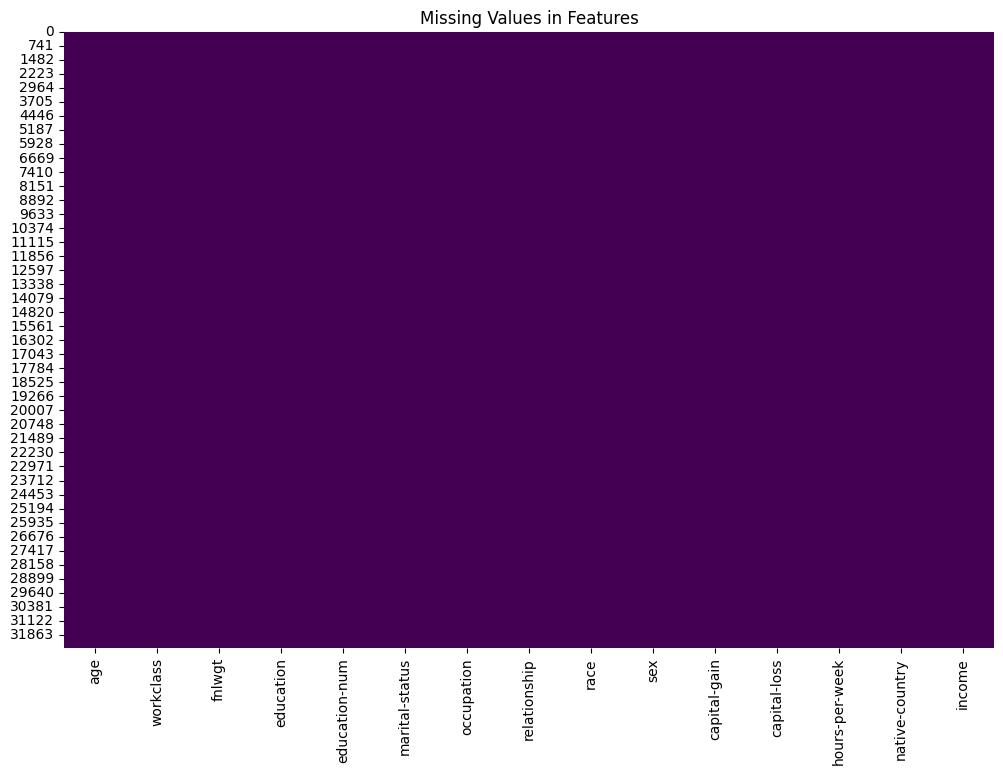

In [ ]:
# Visualize missing values using a heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(census_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Features')
plt.show()

# heatmap for showing correlation between features

<ipython-input-15-bb4b11a0d4c1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = census_data.corr()


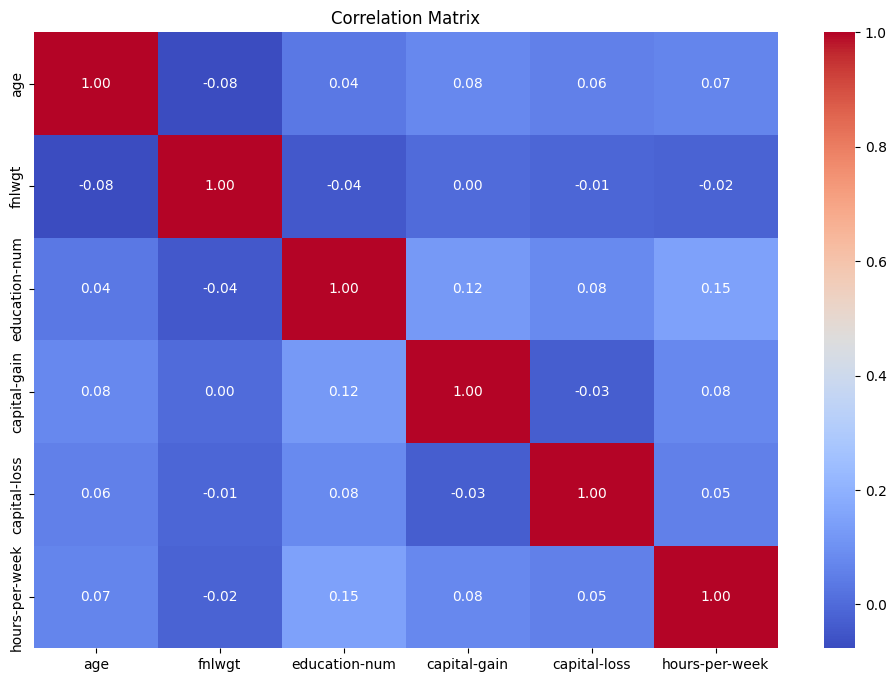

In [ ]:
# Visualize correlation matrix
## finding correlation between features for finding out their affecting to others features
correlation_matrix = census_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# visualising skewness

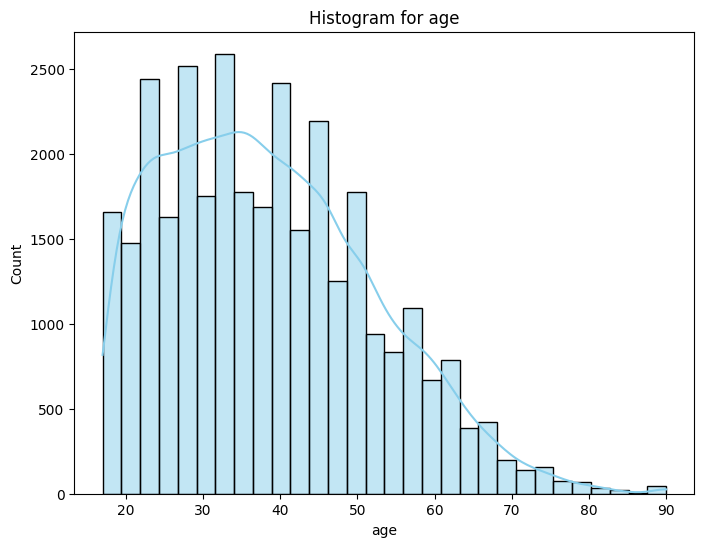

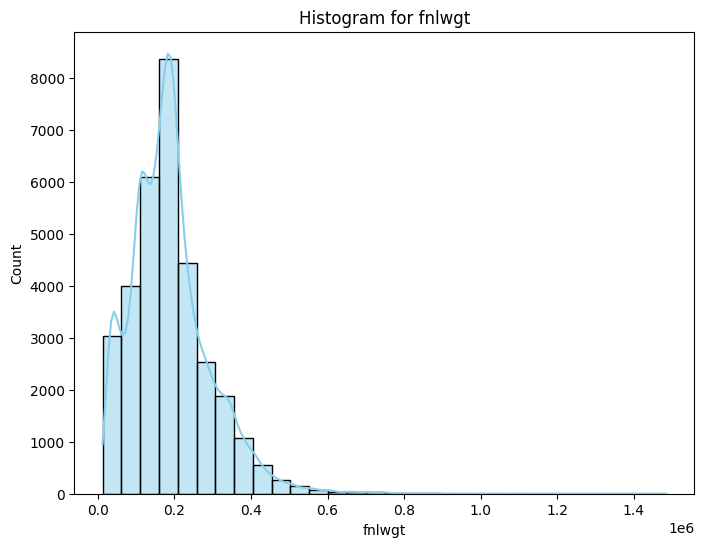

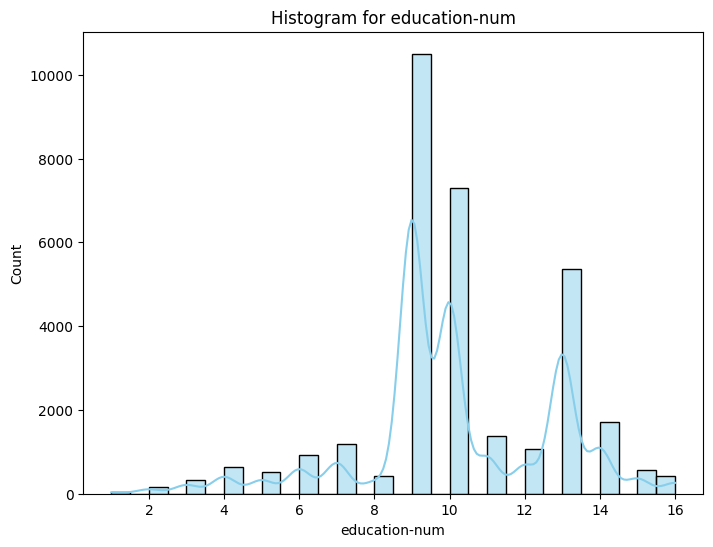

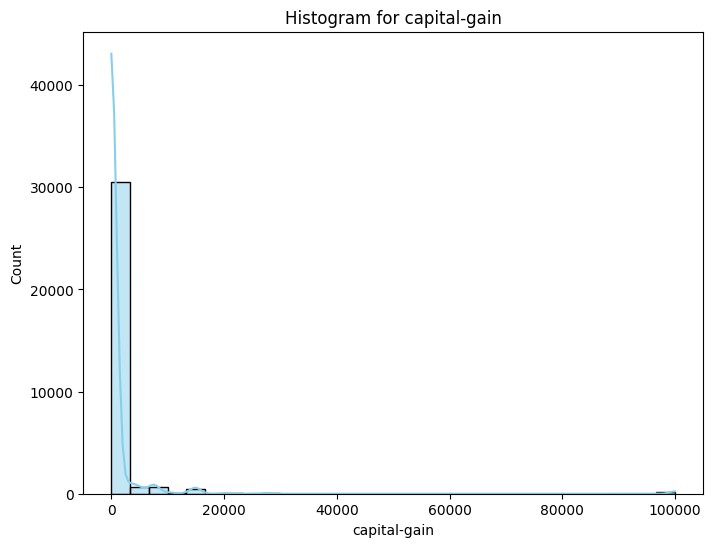

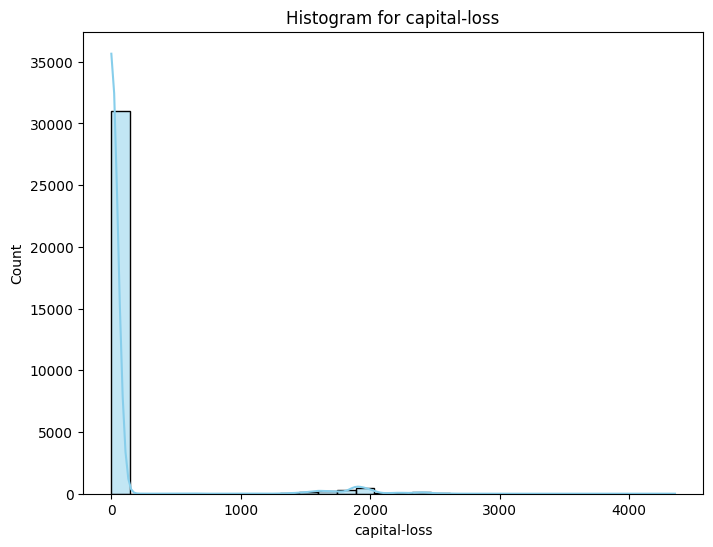

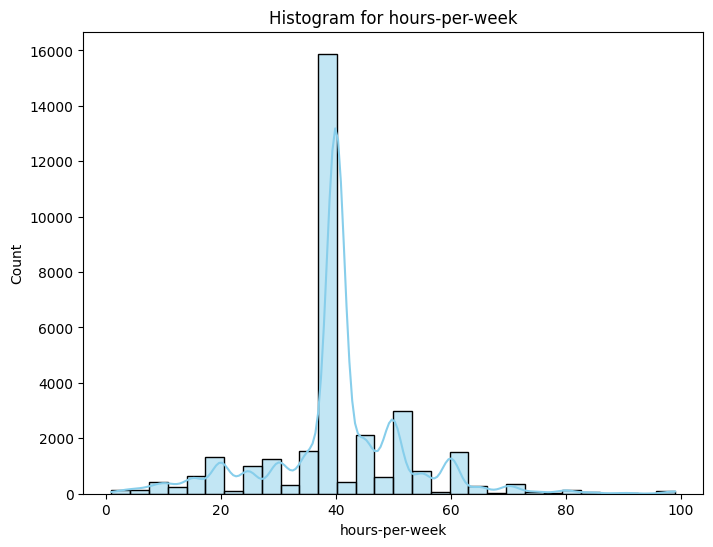

In [ ]:
# Create histograms for selected numerical features
for feature in numerical_variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(census_data[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram for {feature}')
    plt.show()

## **showing skewness with FACET**


In [ ]:
 # Select only numerical features
numerical_features = census_data.select_dtypes(include='number').columns


In [ ]:
# Calculate skewness for each column
skewness = numerical_variables.skew()
print('skewness is :' , skewness)


skewness is : age                0.558743
fnlwgt             1.446980
education-num     -0.311676
capital-gain      11.953848
capital-loss       4.594629
hours-per-week     0.227643
dtype: float64


In [ ]:
# for categorising each feature to type of skewness it is
# Interpret skewness
for column, skew_value in skewness.items():
    if skew_value > 0:
        skew_type = 'right-skewed'
    elif skew_value < 0:
        skew_type = 'left-skewed'
    else:
        skew_type = 'symmetrical'

    print(f"{column} is {skew_type} (Skewness: {skew_value})")


age is right-skewed (Skewness: 0.5587433694130484)
fnlwgt is right-skewed (Skewness: 1.4469800945789826)
education-num is left-skewed (Skewness: -0.3116758679102297)
capital-gain is right-skewed (Skewness: 11.953847687699799)
capital-loss is right-skewed (Skewness: 4.594629121679692)
hours-per-week is right-skewed (Skewness: 0.22764253680450092)


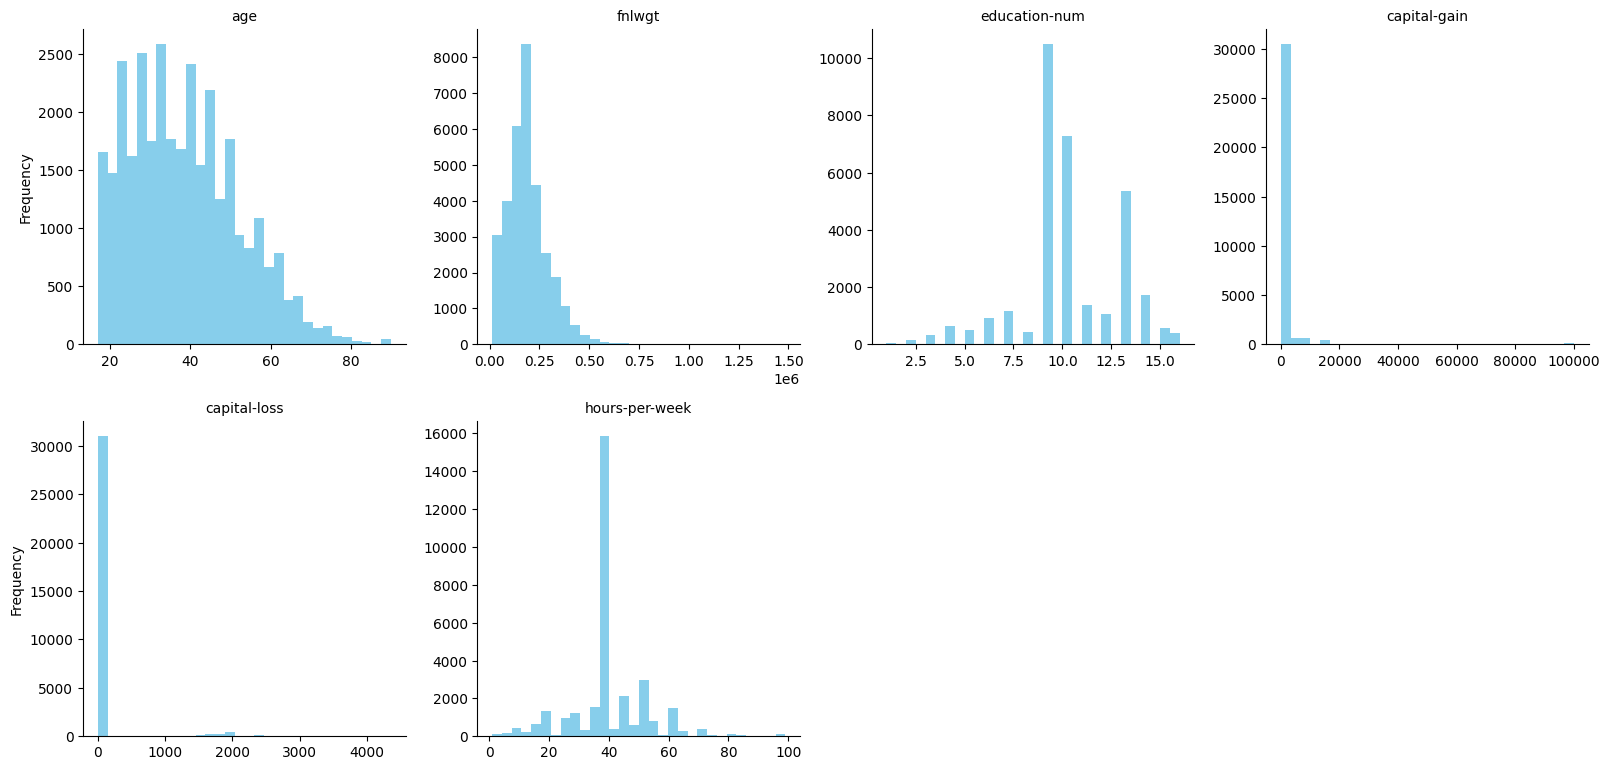

In [ ]:
 # Melt the DataFrame for FacetGrid
melted_data = pd.melt(census_data, value_vars=numerical_features, var_name='Feature', value_name='Value')

# Create a FacetGrid for histograms
g = sns.FacetGrid(melted_data, col='Feature', col_wrap=4, height=4, sharex=False, sharey=False)
g.map(plt.hist, 'Value', bins=30, color='skyblue')
g.set_titles("{col_name}")
g.set_axis_labels("", "Frequency")

plt.show()


# as we can see , 'age' , 'capital-loss' , 'capital-gain', 'fnlwgt' contain skewness as their distributions are not symmetrical
# age and fnlwgt and capital loss are posative direstion meaning that mode<median<mean

> Indented block



# showing relationship between education level and income

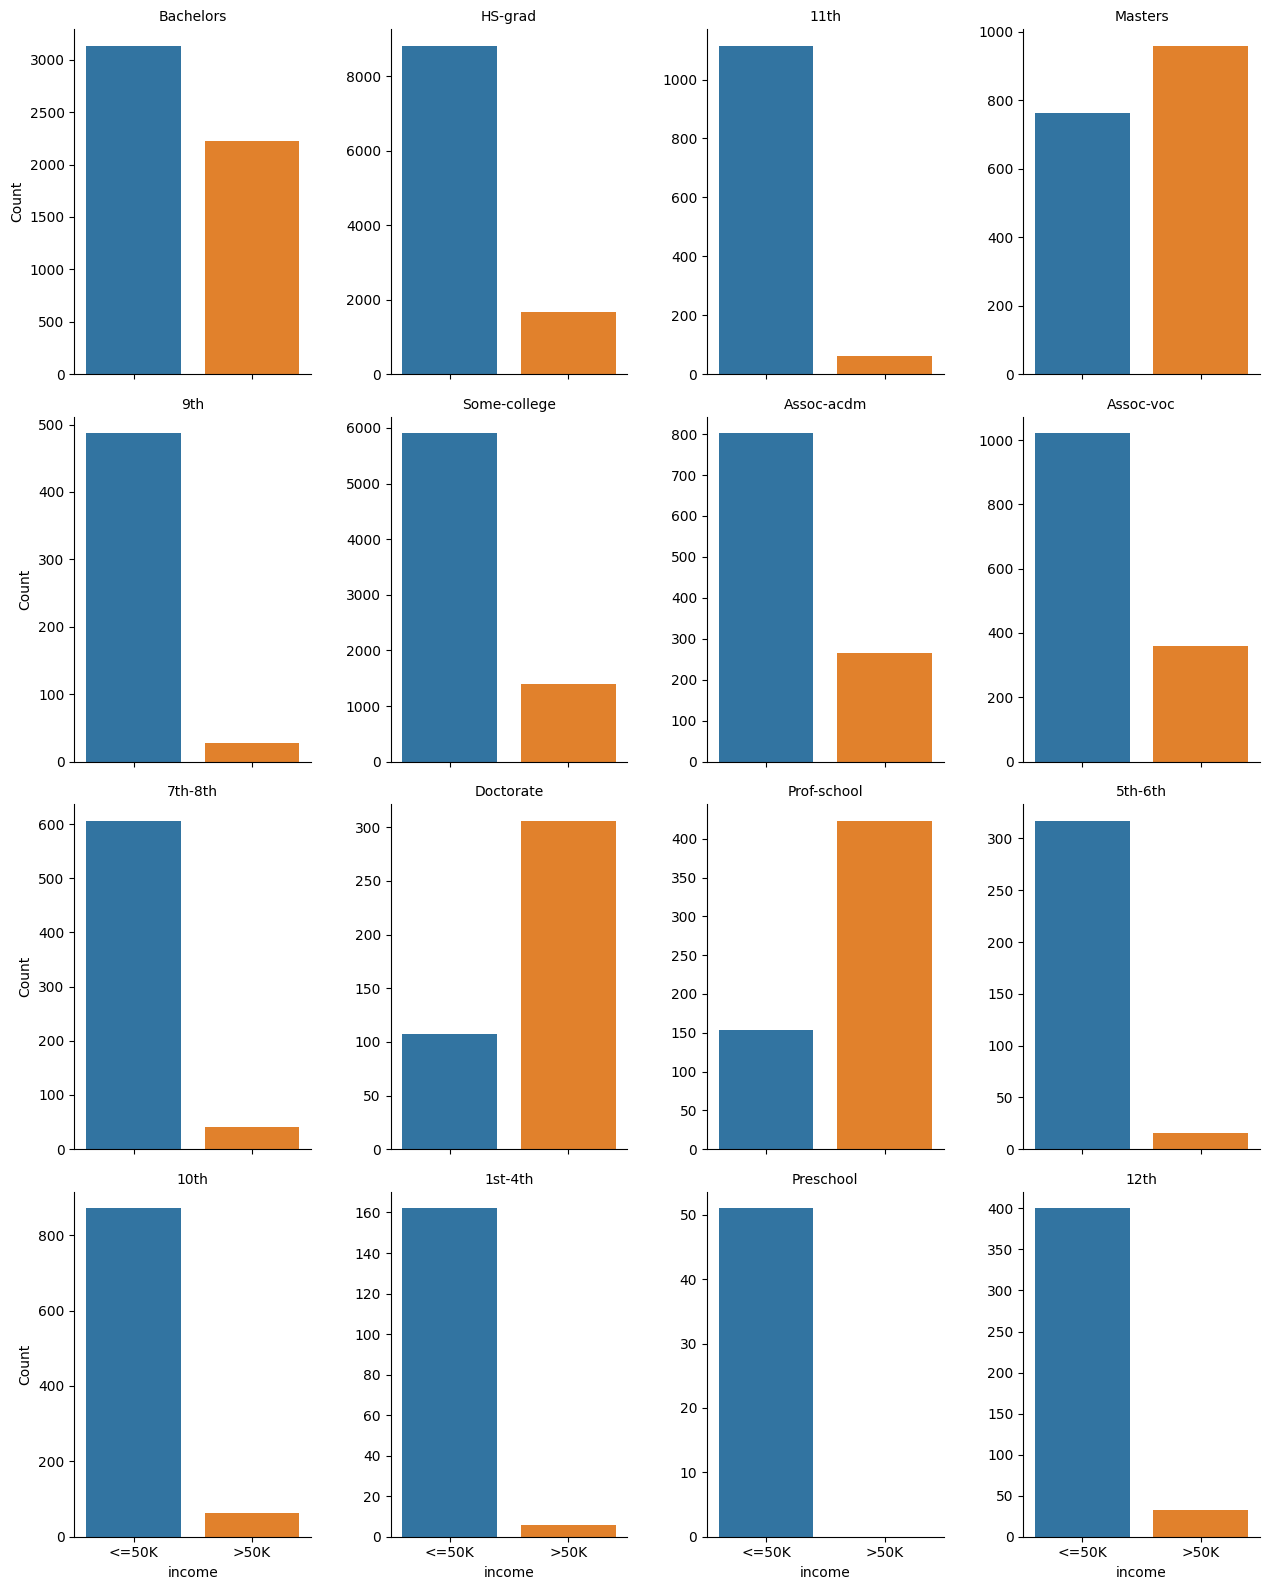

In [ ]:
# Create a catplot with FacetGrid for the relationship
g = sns.catplot(x='income', col='education', col_wrap=4,
                        data=census_data, kind='count', height=4, aspect=0.8, sharey=False)

# Set titles and labels
g.set_titles("{col_name}")
g.set_axis_labels('income', "Count")

plt.show()

In [ ]:
education = census_data['education'].value_counts() # can contain bias as the number of samplinfg data are not same
education# imbalanced

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [ ]:
#groups the census data by two columns, 'education' and 'income'.
# size() method is then applied to count the number of occurrences for each combination of education level and income category.
education_income_proportions = census_data.groupby(['education', 'income']).size()
education_income_proportions

education     income
10th          <=50K      871
              >50K        62
11th          <=50K     1115
              >50K        60
12th          <=50K      400
              >50K        33
1st-4th       <=50K      162
              >50K         6
5th-6th       <=50K      317
              >50K        16
7th-8th       <=50K      606
              >50K        40
9th           <=50K      487
              >50K        27
Assoc-acdm    <=50K      802
              >50K       265
Assoc-voc     <=50K     1021
              >50K       361
Bachelors     <=50K     3134
              >50K      2221
Doctorate     <=50K      107
              >50K       306
HS-grad       <=50K     8826
              >50K      1675
Masters       <=50K      764
              >50K       959
Preschool     <=50K       51
Prof-school   <=50K      153
              >50K       423
Some-college  <=50K     5904
              >50K      1387
dtype: int64

In [ ]:
# Group data by education level and calculate proportions of income categories
#unstack method is used to pivot the grouped data, transforming it into a table format where the 'income' categories become columns
education_income_proportions = census_data.groupby(['education', 'income']).size().unstack(fill_value=0)
#This step ensures that the values in each row (corresponding to a specific education level) represent proportions of each income category.
education_income_proportions = education_income_proportions.div(education_income_proportions.sum(axis=1), axis=0)
print(education_income_proportions)

income           <=50K      >50K
education                       
10th          0.933548  0.066452
11th          0.948936  0.051064
12th          0.923788  0.076212
1st-4th       0.964286  0.035714
5th-6th       0.951952  0.048048
7th-8th       0.938080  0.061920
9th           0.947471  0.052529
Assoc-acdm    0.751640  0.248360
Assoc-voc     0.738784  0.261216
Bachelors     0.585247  0.414753
Doctorate     0.259080  0.740920
HS-grad       0.840491  0.159509
Masters       0.443413  0.556587
Preschool     1.000000  0.000000
Prof-school   0.265625  0.734375
Some-college  0.809765  0.190235


<Figure size 1200x600 with 0 Axes>

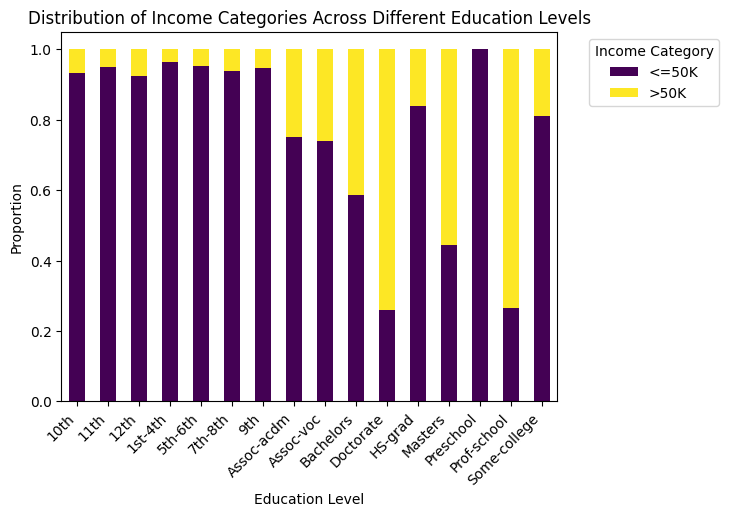

In [ ]:
# Plot the distribution of income categories across education levels
plt.figure(figsize=(12, 6))
education_income_proportions.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of Income Categories Across Different Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.legend(title='Income Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Specify the order of education levels
education_order = ['preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college','Assoc-acdm','Assoc-voc', 'Bachelors','Masters', 'Doctorate','Prof-school']

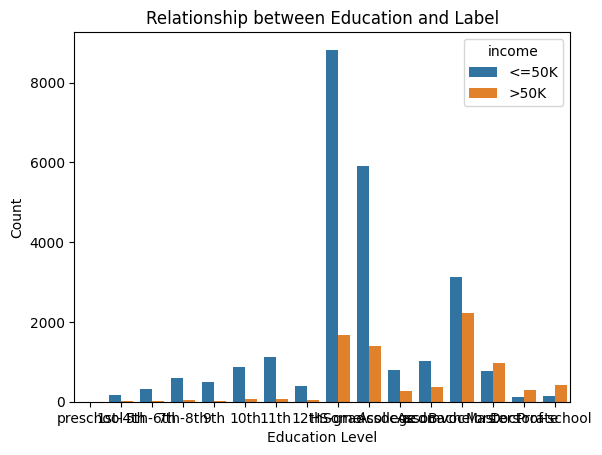

In [ ]:
# Create a count plot with specified order
sns.countplot(x="education", hue="income", data=census_data, order=education_order)

# Customize the plot
plt.title('Relationship between Education and Label')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='income', loc='upper right')

# Display the plot
plt.show()


In [ ]:
education = census_data['education'].value_counts() # can contain bias as the number of samplinfg data are not same
education

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [ ]:
census_data['sex'].value_counts() # our data is bias to men

Male      21790
Female    10771
Name: sex, dtype: int64

In [79]:
martialstatus = census_data['marital-status'].value_counts()
martialstatus

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [ ]:
# Analyze Descriptive Statistics for Gender Distributions across Marital Status Categories
gender_marital_table = pd.crosstab(census_data['sex'], census_data['marital-status'], margins=True, margins_name="Total")
gender_marital_proportions = gender_marital_table / gender_marital_table.loc["Total", "Total"]

print("\nGender Distributions across Marital Status Categories:")
print(gender_marital_proportions)


Gender Distributions across Marital Status Categories:
marital-status  Divorced  Married-AF-spouse  Married-civ-spouse  \
sex                                                               
Female          0.082061           0.000430            0.050889   
Male            0.054390           0.000276            0.409048   
Total           0.136452           0.000706            0.459937   

marital-status  Married-spouse-absent  Never-married  Separated   Widowed  \
sex                                                                         
Female                       0.006296       0.146402   0.019379  0.025337   
Male                         0.006542       0.181690   0.012100  0.005160   
Total                        0.012837       0.328092   0.031479  0.030497   

marital-status     Total  
sex                       
Female          0.330795  
Male            0.669205  
Total           1.000000  


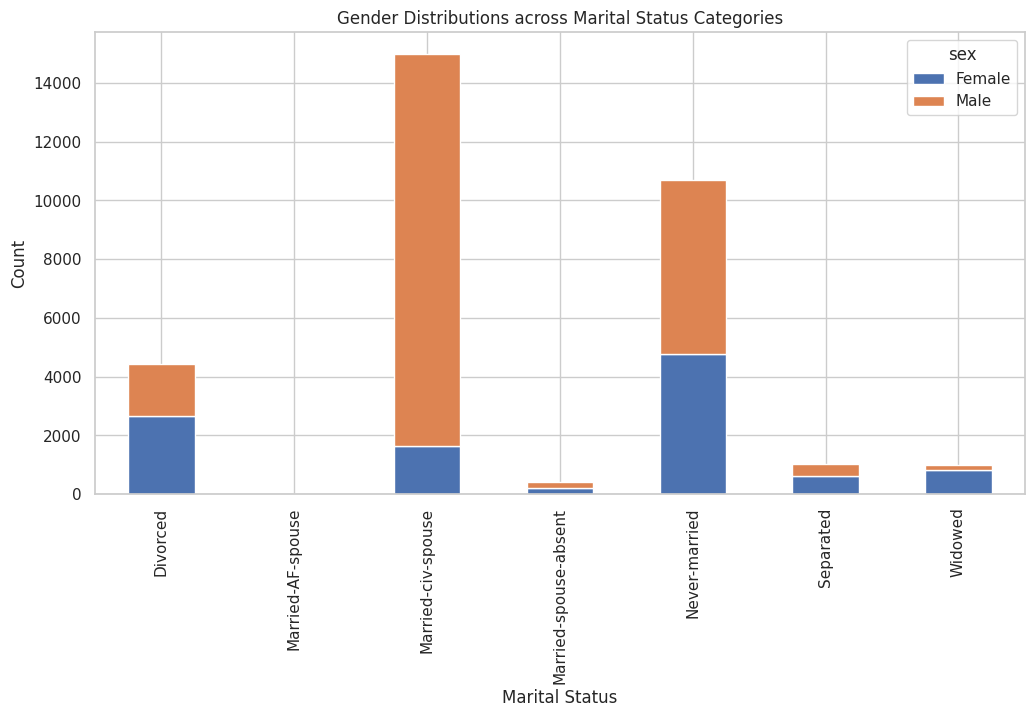

In [ ]:
# Analyze descriptive statistics for gender distributions across marital status categories
marital_gender_distribution = census_data.groupby(['marital-status', 'sex']).size().unstack()

# Plot the results using a stacked bar plot
sns.set(style="whitegrid")
marital_gender_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Gender Distributions across Marital Status Categories')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.utils import resample

In [ ]:
# Separate majority and minority classes
majority_class = census_data[census_data['sex'] == 'Male']
minority_class = census_data[census_data['sex'] == 'Female']

In [ ]:
# Downsample majority class
majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)

In [ ]:
# Combine minority class with downsampled majority class
balanced_data = pd.concat([majority_downsampled, minority_class])


In [ ]:
# checking whether sex features has been balanced
balanced_data['sex'].value_counts() # balanced

Male      10771
Female    10771
Name: sex, dtype: int64

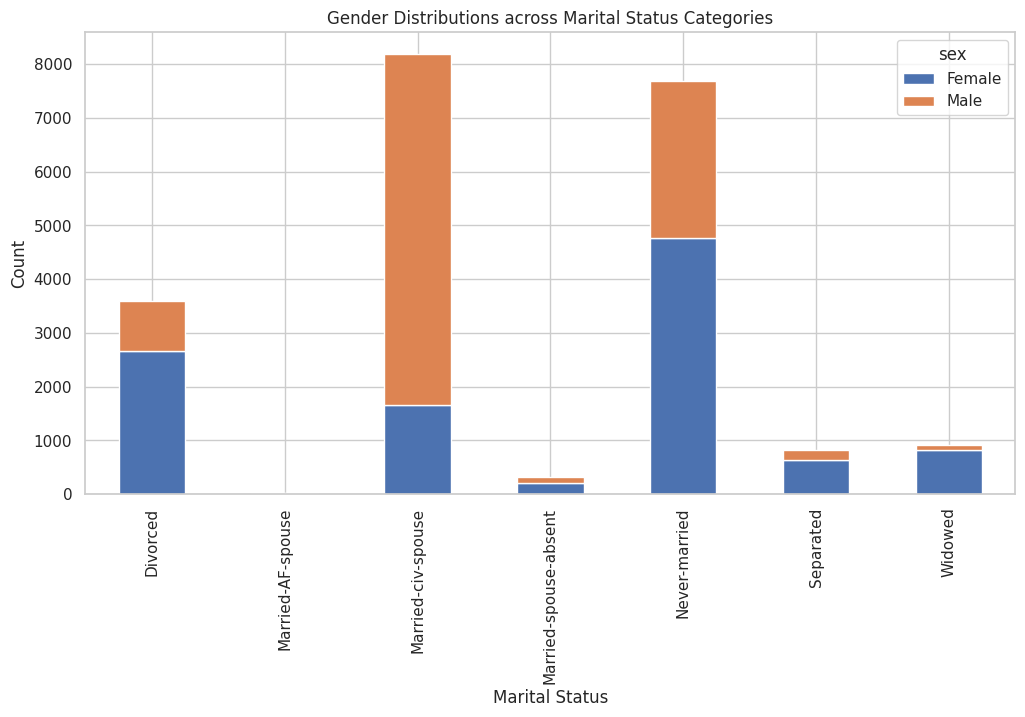

In [ ]:
# Analyze descriptive statistics for gender distributions across marital status categories after resampling
marital_gender_distribution = balanced_data.groupby(['marital-status', 'sex']).size().unstack()

# Plot the results using a stacked bar plot
sns.set(style="whitegrid")
marital_gender_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Gender Distributions across Marital Status Categories')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# **TASK 3**

In [ ]:
!pip install shap

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import shap
import matplotlib.pyplot as plt

In [ ]:

# Load the Heart Disease UCI dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
heart_data = pd.read_csv(url, names=column_names,  na_values='?')


In [ ]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [88]:
heart_data['target'].value_counts() # there are 4 classes for the target feature

0    164
1     55
2     36
3     35
4     13
Name: target, dtype: int64

In [ ]:
# Show the counts of missing values
print("Counts of Missing Values Before Handling:")
print(heart_data.isnull().sum())

Counts of Missing Values Before Handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [ ]:
# Handle missing values using simple imputation (mean for numerical, most frequent for categorical)
heart_data.fillna(heart_data.mean(), inplace=True)

In [ ]:
# Show the counts of missing values after handling
print("\nCounts of Missing Values After Handling:")
print(heart_data.isnull().sum()) #there is no missing value now


Counts of Missing Values After Handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# Separate features and target variable
X = heart_data.drop('target', axis=1)
y = heart_data['target']

In [ ]:
# Use ShuffleSplit for splitting the data into training and testing sets
shuffle_split = ShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in shuffle_split.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
# Display the shapes of the training and testing sets
print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}") # they have equal proportion


Shape of X_train: (242, 13)
Shape of X_test: (61, 13)
Shape of y_train: (242,)
Shape of y_test: (61,)


In [ ]:
# Train a logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

**use** the KernelExplainer from SHAP, which is suitable for kernelbased models like Logistic Regression.

In [ ]:
# Explain model predictions using SHAP values with KernelExplainer
explainer = shap.KernelExplainer(logreg_model.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)

  0%|          | 0/61 [00:00<?, ?it/s]

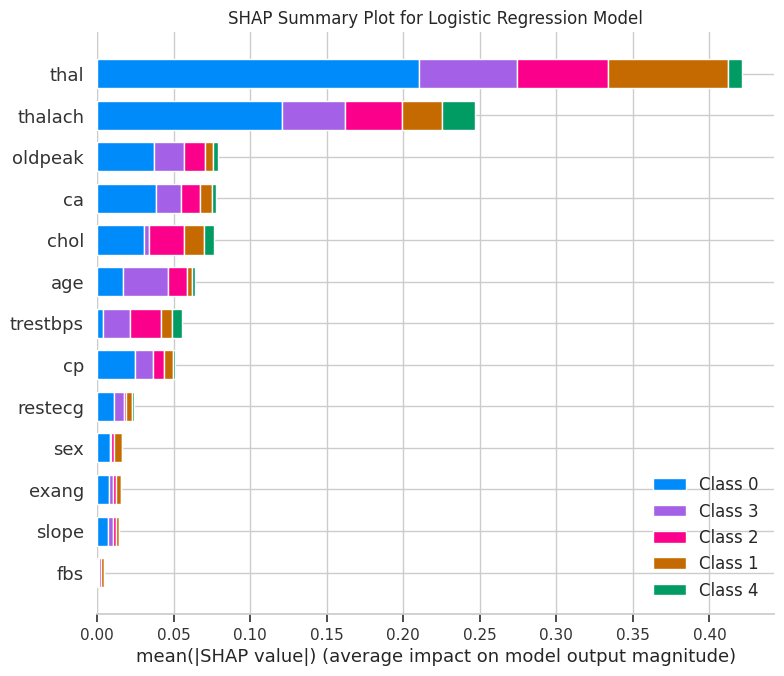

In [ ]:
# Plot SHAP summary plots
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, show=False)
plt.title('SHAP Summary Plot for Logistic Regression Model')
plt.show()

In [ ]:
# Calculate and plot feature importance scores
feature_importance = np.abs(logreg_model.coef_[0])
feature_importance = feature_importance / feature_importance.sum()  # Normalize to sum to 1
sorted_idx = np.argsort(feature_importance)


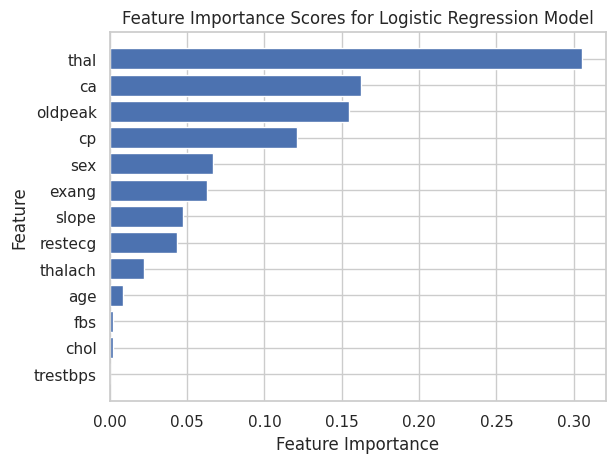

In [ ]:
# Bar chart for feature importance
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), X_test.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Scores for Logistic Regression Model')
plt.show()

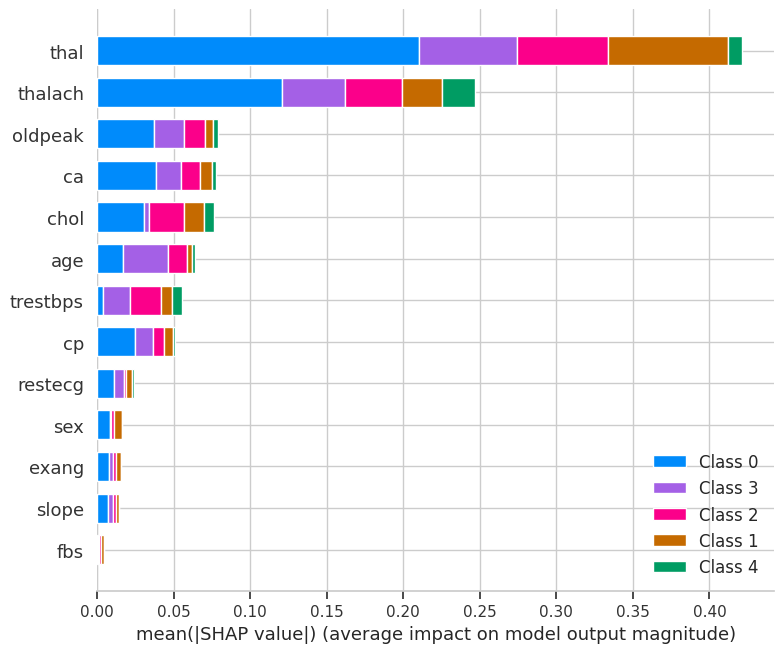

In [91]:
shap.summary_plot(shap_values, X_test)

